In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC

In [2]:
td = pd.read_csv('train.csv')

In [3]:
td.Cabin = td.Cabin.fillna('NA')

In [4]:
td['Salutation'] = td.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [5]:
grp = td.groupby(['Sex', 'Pclass'])

In [6]:
grp.Age.apply(lambda x: x.fillna(x.median()))

Sex     Pclass     
female  1       1      38.0
                3      35.0
                11     58.0
                31     35.0
                52     49.0
                       ... 
male    3       877    19.0
                878    25.0
                881    33.0
                884    25.0
                890    32.0
Name: Age, Length: 891, dtype: float64

In [7]:
td.Age = td.Age.fillna(td.Age.median)

Text(0.5, 1.0, 'Missing values heatmap')

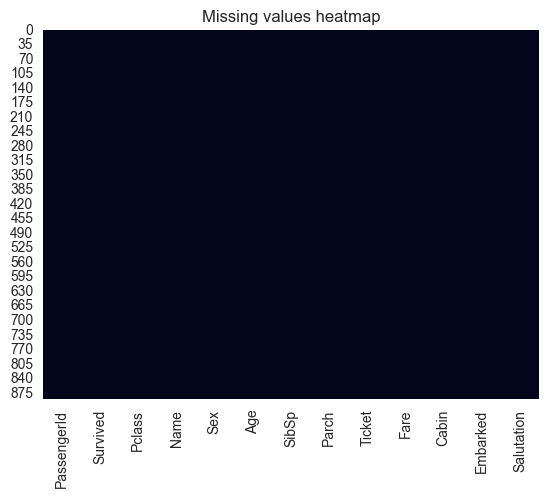

In [8]:
td.isnull().sum()
sns.heatmap(td.isnull(), cbar = False).set_title("Missing values heatmap")

In [9]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  Salutation   891 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 90.6+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
td['Sex'] = LabelEncoder().fit_transform(td['Sex'])

In [12]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  Salutation   891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(6)
memory usage: 87.1+ KB


In [13]:
pd.get_dummies(td.Embarked, prefix="Emb", drop_first = True)

,Emb_Q,Emb_S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [14]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  Salutation   891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(6)
memory usage: 87.1+ KB


In [15]:
td = pd.concat([td,pd.get_dummies(td.Cabin, prefix="Cabin"), pd.get_dummies(td.Embarked, prefix="Emb", drop_first = True), pd.get_dummies(td.Salutation, prefix="Title", drop_first = True), pd.get_dummies(td.Pclass, prefix="Class", drop_first = True)], axis=1)

In [16]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 181 entries, PassengerId to Class_3
dtypes: bool(168), float64(1), int32(1), int64(5), object(6)
memory usage: 233.3+ KB


In [17]:
td['Sex'] = LabelEncoder().fit_transform(td['Sex'])

In [18]:
td.drop(['Fare','Cabin','Name','Salutation', 'Ticket','Embarked', 'Age'], axis=1, inplace=True)

In [19]:
train_data = td
train_data = train_data.dropna()
feature_train = train_data['Survived']
label_train  = train_data.drop(['Survived'], axis = 1)
train_data.shape #891 x 28

(891, 174)

In [20]:
clf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
clf.fit(x_train,  np.ravel(y_train))
print("RF Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")

result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for RF', y=1.05, size=15)

InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

In [21]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 174 entries, PassengerId to Class_3
dtypes: bool(168), int64(6)
memory usage: 188.1 KB


RF Accuracy: 84.92%
The cross validated score for Random forest is: 81.04


Text(0.5, 1.05, 'Confusion_matrix for RF')

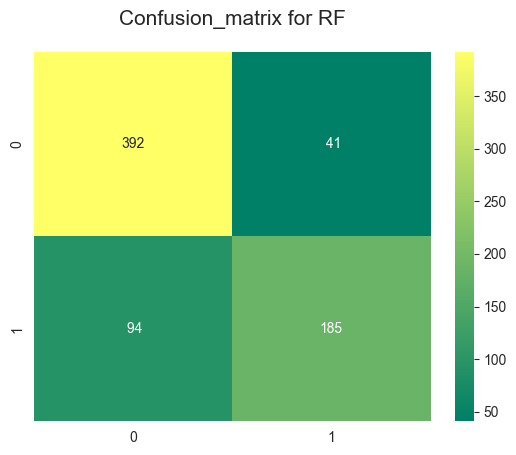

In [22]:
clf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
clf.fit(x_train,  np.ravel(y_train))
print("RF Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")

result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for RF', y=1.05, size=15)

In [24]:
X_to_be_predicted = td[td.Survived.isnull()]
X_to_be_predicted = X_to_be_predicted.drop(['Survived'], axis = 1)

result = result_rf
submission = pd.DataFrame({'PassengerId':X_to_be_predicted.PassengerId,'Survived':result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

ValueError: array length 10 does not match index length 0

In [25]:
X_to_be_predicted.shape

(0, 173)

In [26]:
test = pd.read_csv('train.csv')

In [27]:
test.shape

(891, 12)

In [28]:
test = pd.read_csv('test.csv')

In [29]:
test.shape

(418, 11)

Text(0.5, 1.0, 'Missing values heatmap')

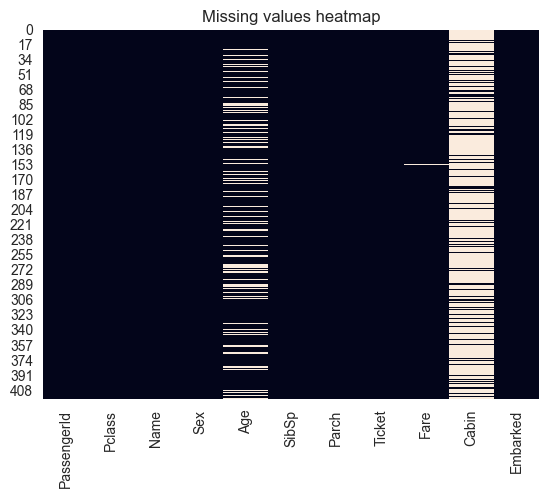

In [30]:
test.isnull().sum()
sns.heatmap(test.isnull(), cbar = False).set_title("Missing values heatmap")

In [31]:
test.Cabin = test.Cabin.fillna('NA')

In [32]:
test['Salutation'] = test.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [33]:
test.info

<bound method DataFrame.info of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  \

In [34]:
group = test.groupby(['Sex', 'Pclass'])

In [35]:
group.Age.apply(lambda x: x.fillna(x.median()))

Sex     Pclass     
female  1       12     23.0
                14     47.0
                22     41.0
                24     48.0
                26     22.0
                       ... 
male    3       399    31.0
                413    24.0
                415    38.5
                416    24.0
                417    24.0
Name: Age, Length: 418, dtype: float64

In [36]:
test.Age = test.Age.fillna(test.Age.median)

Text(0.5, 1.0, 'Missing values heatmap')

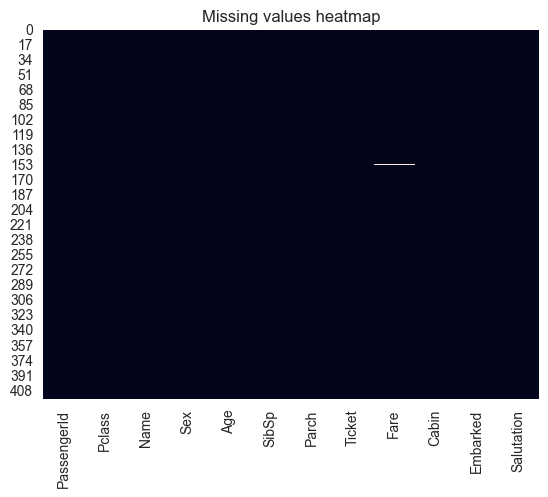

In [37]:
test.isnull().sum()
sns.heatmap(test.isnull(), cbar = False).set_title("Missing values heatmap")

In [38]:
test['Sex'] = LabelEncoder().fit_transform(test['Sex'])

In [39]:
pd.get_dummies(test.Embarked, prefix="Emb", drop_first = True)

,Emb_Q,Emb_S
0,True,False
1,False,True
2,True,False
3,False,True
4,False,True
...,...,...
413,False,True
414,False,False
415,False,True
416,False,True


In [40]:
test = pd.concat([test,pd.get_dummies(test.Cabin, prefix="Cabin"), pd.get_dummies(test.Embarked, prefix="Emb", drop_first = True), pd.get_dummies(test.Salutation, prefix="Title", drop_first = True), pd.get_dummies(test.Pclass, prefix="Class", drop_first = True)], axis=1)

In [41]:
test['Sex'] = LabelEncoder().fit_transform(test['Sex'])

In [42]:
test.drop(['Fare','Cabin','Name','Salutation', 'Ticket','Embarked', 'Age'], axis=1, inplace=True)

In [43]:
test.shape

(418, 94)

In [44]:
X_to_be_predicted = test

result = clf.predict(X_to_be_predicted)
submission = pd.DataFrame({'PassengerId':X_to_be_predicted.PassengerId,'Survived':result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Cabin_A11
- Cabin_A18
- Cabin_A21
- Cabin_A29
- Cabin_A9
- ...
Feature names seen at fit time, yet now missing:
- Cabin_A10
- Cabin_A14
- Cabin_A16
- Cabin_A19
- Cabin_A20
- ...


In [45]:
test.info

<bound method DataFrame.info of      PassengerId  Pclass  Sex  SibSp  Parch  Cabin_A11  Cabin_A18  Cabin_A21  \
0            892       3    1      0      0      False      False      False   
1            893       3    0      1      0      False      False      False   
2            894       2    1      0      0      False      False      False   
3            895       3    1      0      0      False      False      False   
4            896       3    0      1      1      False      False      False   
..           ...     ...  ...    ...    ...        ...        ...        ...   
413         1305       3    1      0      0      False      False      False   
414         1306       1    0      0      0      False      False      False   
415         1307       3    1      0      0      False      False      False   
416         1308       3    1      0      0      False      False      False   
417         1309       3    1      1      1      False      False      False   

     Ca